# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
import os
medical = pd.read_csv(r"C:\Users\Sheng Miao\OneDrive\桌面\SpringBoard\Springboard_MyProjects\Frequentist_Case_Study\Frequentist Case Study\insurance2.csv")

In [60]:
medical.shape

(1338, 8)

In [61]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

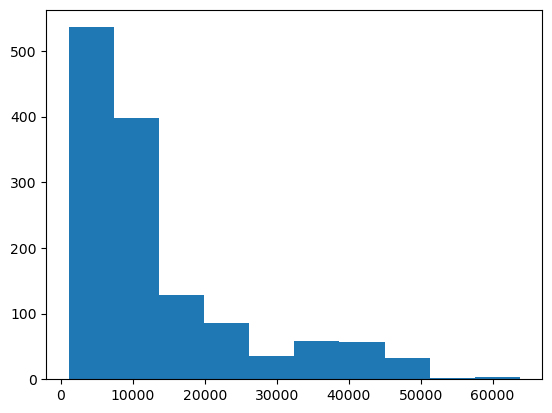

In [62]:
_ = plt.hist(medical.charges)

In [63]:
charges_mean = np.mean(medical.charges)
charges_std = np.std(medical.charges)
print("The mean of medical charges is:", charges_mean)
print("The standard deviation of medical charges is:", charges_std)

The mean of medical charges is: 13270.422265141257
The standard deviation of medical charges is: 12105.484975561605


__Comment:__
The histogram of the medical charges reveals a screwed distribution toward values below 10000, making the calculation of mean and standard deviation inappropriate. 

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

13268.292567069491
331.9939687156728
330.943713906084


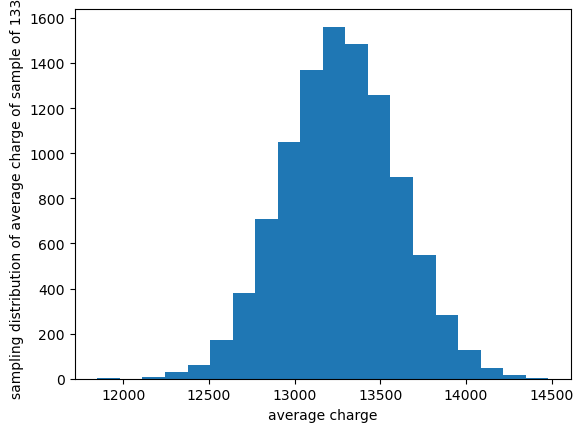

In [64]:
def sampler(n):
    return np.random.choice(medical.charges, n)

seed(47)
sample_means = [np.mean(sampler(1338)) for i in range (10000)]
_ = plt.hist(sample_means, bins=20)
_ = plt.xlabel('average charge')
_ = plt.ylabel('sampling distribution of average charge of sample of 1338')

CLT_mean = np.mean(sample_means)
CLT_std = np.std(sample_means)
print(CLT_mean)
print(CLT_std)
print(charges_std/np.sqrt(1338))

__A:__
The above is the distribution of the means of medical charges of size 1338 taken randomly from the sample with replacement. The Central Limit Theorem tells us that although the skewed distribution of medical charges, the sampling distribution of the charge means is close to a normal distribution, and the expected mean of this distribution will be equal to the population mean. However, since the population mean is still unknown, the most appropriate frequentist test should be the t-statistic test.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__

In [65]:
t_value = t.ppf(0.05,df=1337)
print(f"The critical t-value for a one tailed test at p-value of 0.05, with 1337 degrees of freedom, is: {t_value:.2f}")

confidence_interval_t = t.ppf([0.05, 1], loc=CLT_mean, scale=CLT_std/np.sqrt(1338), df=1337)
print("The 95% confidence interval for a one tailed test with 1337 degrees of freedom, is:", confidence_interval_t)

prob_below_12000 = t.cdf(12000, loc=CLT_mean, scale=CLT_std/np.sqrt(1338), df=1337)
print("The probability that the mean charges are less than 12000 is", prob_below_12000)

The critical t-value for a one tailed test at p-value of 0.05, with 1337 degrees of freedom, is: -1.65
The 95% confidence interval for a one tailed test with 1337 degrees of freedom, is: [13253.35326133            inf]
The probability that the mean charges are less than 12000 is 0.0


 __Comment:__
 As a result, the 95% confidence interval for a one-tailed test for the sampling distribution of the mean charges, with 1337 degrees of freedom, is above 13253, which is well above 12000. calculations using the t.cdf() function reveals that the probability of the mean charges being less than 12000 is close to 0. Therefore, the administrator should not be concerned that the actual average charge has fallen below 12,000.

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__
We assume that the metric variable--charges--is normally distributed and its variances in the two groups are approximately equal. 

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [67]:
# the manual approach to calculate the value of the test statistic and then its probability
# get charges data for insurance patients and non-insurance patients
insur = medical.loc[medical['insuranceclaim'] == 1, 'charges']
no_insur = medical.loc[medical['insuranceclaim'] == 0, 'charges']

# calculate means, standard deviations, and n for both groups
insur_mean = np.mean(insur)
no_insur_mean = np.mean(no_insur)
print(f"The mean charges of patients with insurance is: {insur_mean:.0f}")
print(f"The mean charges of patients without insurance is: {no_insur_mean:.0f}")

insur_std = np.std(insur)
no_insur_std = np.std(no_insur)
print(f"The standard deviation of charges of patients with insurance is: {insur_std:.0f}")
print(f"The standard deviation of charges of patients without insurance is: {no_insur_std:.0f}")

insur_n = len(insur)
no_insur_n = len(no_insur)
print(f"The number of patients with insurance is: {insur_n:.0f}")
print(f"The number of patients without insurance is: {no_insur_n:.0f}")

# calculate pooled standard deviation, manual_s
pooled_s = np.sqrt(
    ((insur_n - 1)*insur_std**2 + (no_insur_n - 1)*no_insur_std**2) / (insur_n + no_insur_n - 2)
)
print(f"The pooled standard deviation calculated manually is: {pooled_s:.2f}")

# calculate t-value 
manual_t = (insur_mean - no_insur_mean) / (pooled_s * np.sqrt((1 / insur_n) + (1 / no_insur_n)))
print(f"The t-value calculated manually is: {manual_t:.2f}")

# calcualte degrees of freedom
df = insur_n + no_insur_n - 2
print(f"The degrees of freedom is: {df:.0f}")

# calcualte p-value
manual_two_tailed_p = 2 * (1 - t.cdf(manual_t, df))
print(f"The p-value for two-tailed test is: {manual_two_tailed_p:.2f}")

The mean charges of patients with insurance is: 16424
The mean charges of patients without insurance is: 8821
The standard variation of charges of patients with insurance is: 14037
The standard variation of charges of patients without insurance is: 6441
The number of patients with insurance is: 783
The number of patients without insurance is: 555
The pooled standard deviation calculated manually is: 11512.28
The t-value calculated manually is: 11.90
The degrees of freedom is: 1336
The p-value for two-tailed test is: 0.00


In [85]:
# perform t-test on two independent samples using function ttest_ind from scipy.stats
from scipy.stats import ttest_ind
t_value, p_value = ttest_ind(insur, no_insur, equal_var=True, alternative='two-sided')
print(f"The t_value calculated by scipy is: {t_value:.2f}")
print(f"The p_value calculated by scipy is: {p_value:.2f}")

The t_value calculated by scipy is: 11.89
The p_value calculated by scipy is: 0.00


__Comment:__
Both the manual calculation and the scipy.stats.ttest_ind function produce consistent result for t-value and p-value. 

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__
I couldn't found an equivalent one for performing a z-test in the documentation for statistical test functions in scipy.stats. The absence of a z-test function in scipy.stats likely reflects the practical focus on t-tests, which are more widely applicable given unknown population parameters. The library prioritizes tests that are more relevant to real-world data, where population parameters are usually not known.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test